In [11]:
from keras.layers import Input, Dense, GaussianNoise
from keras.models import Model

# Define the encoding dimension
encoding_dim = 32

# Create the input placeholder
input_img = Input(shape=(784,))
# Add Gaussian noise to the input
noisy_input = GaussianNoise(0.5)(input_img)

# Define the encoder layers
encoded = Dense(128, activation='relu')(noisy_input)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Define the decoder layers
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the denoising autoencoder model
denoising_autoencoder = Model(input_img, decoded)

# Compile the denoising autoencoder
denoising_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


1/1 [==============================] - 0s 61ms/step


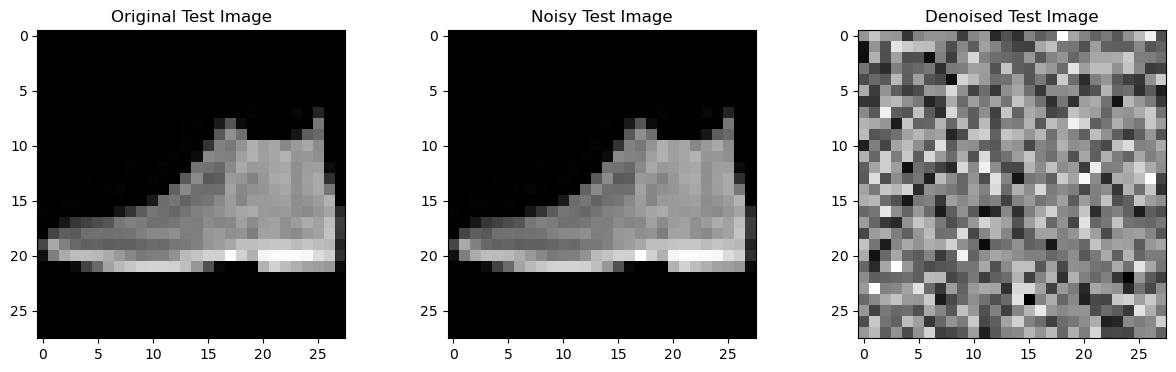

In [12]:
from keras.datasets import fashion_mnist  # Import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the encoding dimension
encoding_dim = 32

# Create the input placeholder
input_img = Input(shape=(784,))
# Add Gaussian noise to the input
noisy_input = GaussianNoise(0.5)(input_img)

# Define the encoder layers
encoded = Dense(128, activation='relu')(noisy_input)  # Add a new hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Define the decoder layers
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the denoising autoencoder model
denoising_autoencoder = Model(input_img, decoded)

# Compile the denoising autoencoder
denoising_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


# The code for the denoising autoencoder and visualization should follow this part.

# Make a prediction on a test sample
sample_index = 0
noisy_sample = np.array([x_test[sample_index]])
prediction = denoising_autoencoder.predict(noisy_sample)

# Visualize the original test data, noisy test data, and denoised test data
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')
plt.title("Original Test Image")

plt.subplot(1, 3, 2)
plt.imshow(noisy_sample.reshape(28, 28), cmap='gray')
plt.title("Noisy Test Image")

plt.subplot(1, 3, 3)
plt.imshow(prediction.reshape(28, 28), cmap='gray')
plt.title("Denoised Test Image")

plt.show()


Epoch 1/5
235/235 [==============================] - 3s 10ms/step - loss: 0.6956 - val_loss: 0.6938
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6954 - val_loss: 0.6937
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6953 - val_loss: 0.6936
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6952 - val_loss: 0.6935
Epoch 5/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6950 - val_loss: 0.6934


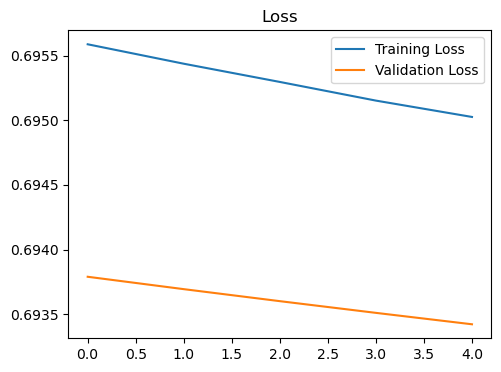

In [13]:
# Train the denoising autoencoder
history = denoising_autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Plot training and validation accuracy (if applicable)
if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

plt.show()
